# Customer Segmentation using KMeans

### Import libraries

In [1]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

### Load Data From CSV File  

In [2]:
df = pd.read_csv("customers.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
df.shape

(850, 10)

### Pre-processing

In [4]:
df = df [['Age','Income']]
df.head()

,Age,Income
0,41,19
1,47,100
2,33,57
3,29,19
4,47,253


In [5]:
# Standarize data
from sklearn.preprocessing import scale
df['Age'] = scale(df['Age'])
df['Income'] = scale(df['Income'])
df.head()

,Age,Income
0,0.742915,-0.718459
1,1.489490,1.384325
2,-0.252518,0.268032
3,-0.750235,-0.718459
4,1.489490,5.356249


### Modeling

In [6]:
clusterNum = 4
k_means = KMeans(n_clusters = clusterNum)
k_means.fit(df)
labels = k_means.labels_
print(labels[:100])

[0 1 0 3 2 1 0 1 3 1 1 0 3 0 3 3 3 0 1 0 3 0 3 1 1 1 3 0 0 0 1 0 3 0 3 0 0
 0 3 1 3 1 3 2 0 1 3 3 3 3 1 0 3 1 3 0 3 3 0 1 0 0 0 1 3 3 0 3 0 3 3 1 0 3
 3 3 0 0 1 1 0 3 1 0 1 3 3 3 3 3 0 0 3 3 0 1 0 0 3 3]


### Insights
We assign the labels to each row in dataframe.

In [7]:
df["cluster"] = labels
df.head(5)

,Age,Income,cluster
0,0.742915,-0.718459,0
1,1.489490,1.384325,1
2,-0.252518,0.268032,0
3,-0.750235,-0.718459,3
4,1.489490,5.356249,2


We can easily check the centroid values by averaging the features in each cluster.

In [8]:
df.groupby('cluster').mean()

,Age,Income
cluster,,
0,0.356651,-0.178469
1,1.300814,0.944527
2,1.328464,4.792758
3,-0.954453,-0.474036


In [9]:
k_means.cluster_centers_

array([[ 0.35440717, -0.17789713],
       [ 1.30081357,  0.94452688],
       [ 1.32846449,  4.79275772],
       [-0.95608928, -0.47540264]])

In [10]:
df.cluster.value_counts()

3    354
0    326
1    153
2     17
Name: cluster, dtype: int64

Now, lets look at the distribution of customers based on their age and income:

In [11]:
centers = k_means.cluster_centers_

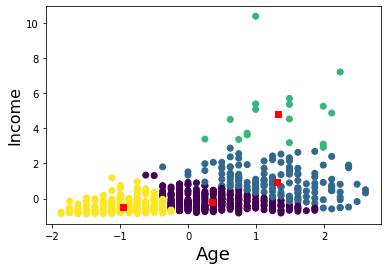

In [12]:
plt.scatter(df['Age'], df['Income'], c=labels.astype(float))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.scatter(centers[:,0],centers[:,1], c="red",marker="s" )
plt.show()

In [13]:
k_means.inertia_    # Sum of squared distances of samples to their closest cluster center (centroid)

430.2275367176715

In [14]:
cost = []
for k in range(2,10):
   kmeans = KMeans(n_clusters=k)
   kmeans.fit(df)
   cost.append(kmeans.inertia_)   

Text(0, 0.5, 'Inertia (Cost)')

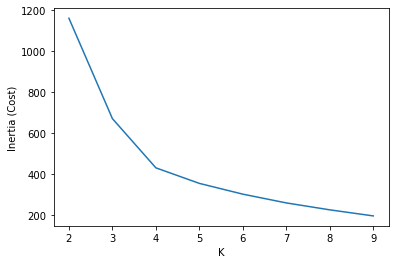

In [15]:
plt.plot(range(2,10), cost)
plt.xlabel("K")
plt.ylabel("Inertia (Cost)")